In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

In [3]:
with open('Manual WorkItems alltypes Security.csv', encoding='ascii', errors='ignore') as infile:
    dataset1 = pd.read_csv(infile,names = ['Title', 'Security', 'SourceLink'])
with open('Manual WorkItems alltypes nonSecurity.csv', encoding='ascii', errors='ignore') as infile:
    dataset2 = pd.read_csv(infile,names = ['Title', 'Security', 'SourceLink'])

In [4]:
dataset1 = dataset1.sample(frac = 0.45, random_state= 123).reset_index(drop = True)
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 3 columns):
Title         63261 non-null object
Security      63262 non-null object
SourceLink    63262 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


In [5]:
dataset1['IsSecured'] = 1
dataset2['IsSecured'] = 0

In [6]:
dataset = pd.concat([dataset1, dataset2]).reset_index(drop = True)
dataset.head()

,Title,Security,SourceLink,IsSecured
0,[WDGISScan] Perf.Service.PASAPI 'pasdb.westus....,MS.Security,https://microsoft.visualstudio.com/DefaultColl...,1
1,[Studio]Form shouldn't load another datasource...,MS.Security,https://msazure.visualstudio.com/DefaultCollec...,1
2,Glusterfs should only allow certain ip range t...,MS.Security,https://msasg.visualstudio.com/DefaultCollecti...,1
3,[dev15->devmain] Fuzzing: Mac Word: doc: Proba...,MS.Security,http://bugcheck/bugs/OfficeMain/75542,1
4,(Port to wacserver 16) MSRC 32783. Word Crash ...,MS.Security,https://office.visualstudio.com/DefaultCollect...,1


In [7]:
dataset = dataset.sample(frac = 1).reset_index(drop = True)
dataset.head()

,Title,Security,SourceLink,IsSecured
0,Security investigation: can we restrict SQL me...,MS.Security,https://mseng.visualstudio.com/DefaultCollecti...,1
1,AMS cert update in Fairfax,MS.Security,https://msecg.visualstudio.com/DefaultCollecti...,1
2,Enumerate accounts,MS.Security,https://o365exchange.visualstudio.com/DefaultC...,1
3,"User cannot select ""Microsoft Store"" link in G...",MS.Accessibility,https://microsoft.visualstudio.com/DefaultColl...,0
4,Probably Exploitable: ReadAV On Block Move in ...,MS.Security,http://bugcheck/bugs/OfficeMain/313321,1


In [8]:
dataset.dropna(axis=0, how='any', inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122058 entries, 0 to 122059
Data columns (total 4 columns):
Title         122058 non-null object
Security      122058 non-null object
SourceLink    122058 non-null object
IsSecured     122058 non-null int64
dtypes: int64(1), object(3)
memory usage: 4.7+ MB


In [10]:
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
type(my_stopwords),my_stopwords

(list,
 ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further'

In [11]:
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm1
from statsmodels.formula.api import logit, ols, poisson, probit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
import os, sys
def splitall(path):
    allparts = []
    while 1:
        parts = os.path.split(path)
        if parts[0] == path:  # sentinel for absolute paths
            allparts.insert(0, parts[0])
            break
        elif parts[1] == path: # sentinel for relative paths
            allparts.insert(0, parts[1])
            break
        else:
            path = parts[0]
            allparts.insert(0, parts[1])
    return " ".join(allparts)

In [13]:
#I will now apply the splitall function on the dataset.
dataset['Parsed Title'] = dataset['Title'].apply(splitall)
#dataset.head(100)

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def clean_text(text):
    text = "".join([char if char.isalpha() else " " for char in text.lower()]).split()
    text = [ps.stem(word) for word in text]
    #text = " ".join([word for word in text if (word not in my_stopwords and len(word) > 2)])
    text = " ".join([word for word in text if (len(word) > 2)])
    return text.lower()

In [15]:
%time dataset['Clean Title'] = dataset['Parsed Title'].apply(clean_text)

Wall time: 47.6 s


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectPercentile, f_classif
X, y = dataset['Clean Title'], dataset['IsSecured']
tv = TfidfVectorizer(min_df=0.002, max_df= 1.0, use_idf=True,ngram_range=(1,3))
#tv = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english')
#selector = SelectPercentile(f_classif, percentile = 10)
#selector.fit(tv.fit_transform(X))
#X_train, X1, y_train, y1 = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X1, y1, test_size=0.5, random_state=42)
X_train = tv.fit_transform(X_train)#.toarray()
#X_test = tv.transform(X_test)#.toarray()
X_val = tv.transform(X_val)#.toarray()
vocab = tv.get_feature_names()
# y_test = np.array(list(y_test))
# y_train = np.array(list(y_train))
# y_val = np.array(list(y_val))
print(len(vocab))


1099


In [17]:
X_val.shape,X_train.shape

((24412, 1099), (97646, 1099))

In [18]:
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

print("Extracting best features by a chi-squared test")
t0 = time()
ch2 = SelectKBest(chi2, k=500)
X_train = ch2.fit_transform(X_train, y_train)
X_val=ch2.transform(X_val)
#X_test = ch2.transform(X_test)
feature_names = [vocab[i] for i in ch2.get_support(indices=True)]
print("done in %fs" % (time() - t0))
print(feature_names)

Extracting best features by a chi-squared test
done in 0.507659s
['about', 'about the', 'acc', 'access', 'access android', 'access inspect', 'access keyboard', 'access keyboard navig', 'access name', 'access narrat', 'access screen', 'access screen reader', 'access use', 'access violat', 'access win', 'activ', 'afd', 'after activ', 'after select', 'album', 'allow', 'alt', 'announc', 'announc the', 'api', 'are not', 'are not access', 'are use', 'aria', 'arrow', 'arrow key', 'assess', 'attack', 'auth', 'authent', 'banner', 'base', 'binari', 'bind', 'binscop', 'binskim', 'binskim warn', 'black', 'blade', 'book', 'box', 'build', 'button', 'button not', 'cach', 'cap', 'case', 'case open', 'caus', 'cert', 'cert for', 'certain', 'certif', 'certif for', 'certif for subscript', 'cfg', 'channel', 'chat', 'client', 'close', 'close button', 'code', 'collaps', 'color', 'color contrast', 'com', 'combo', 'combo box', 'commun', 'compromis', 'config', 'conform', 'connect', 'connect credenti', 'connect 

In [19]:
target_names=y_train.values
target_names

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [20]:
def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [21]:
# #############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_val)
    test_time = time() - t0
    print("Validation time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_val, pred)
    print("accuracy:   %0.3f" % score)
    
    f1_score = metrics.f1_score(y_val, pred)
    print("f1_score:   %0.3f" % f1_score)
    
    precision_score = metrics.precision_score(y_val, pred)
    print("precision_score:   %0.3f" % precision_score)
    
    recall_score = metrics.recall_score(y_val, pred)
    print("recall_score:   %0.3f" % recall_score)
    
    roc_auc_score = metrics.roc_auc_score(y_val, pred)
    print("roc_auc_score:   %0.3f" % roc_auc_score)
    
    fpr, tpr, thresh = metrics.roc_curve(y_val, pred)
    
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        #print("top 20 keywords per class:")
        #for i, label in enumerate(target_names):
            #top20 = np.argsort(clf.coef_[i])[-20:]
            #print(feature_names[top20])
        print()

    print("classification report:")
    print(metrics.classification_report(y_val, pred,
                                            target_names=['class1','class0']))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_val, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score,train_time,test_time,f1_score,precision_score,recall_score,roc_auc_score,fpr,tpr

In [84]:
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        #(KNeighborsClassifier(n_neighbors=5,n_jobs=4), "kNN"),
        (RandomForestClassifier(n_estimators=500,max_features=50,n_jobs=4), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,tol=1e-2)))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.1)))
results.append(benchmark(BernoulliNB(alpha=.1)))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)


C:\Users\inpganavar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.819s
Validation time:  0.000s
accuracy:   0.908
f1_score:   0.914
precision_score:   0.884
recall_score:   0.947
roc_auc_score:   0.906
dimensionality: 500
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.94      0.87      0.90     11716
     class0       0.88      0.95      0.91     12696

avg / total       0.91      0.91      0.91     24412

confusion matrix:
[[10142  1574]
 [  674 12022]]

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 30, 'subsample': 0.8,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 3}
benchmark(ensemble.GradientBoostingClassifier(**params))

________________________________________________________________________________
Training: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=30,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=3, subsample=0.8, verbose=0,
              warm_start=False)
train time: 1317.188s
Validation time:  4.098s
accuracy:   0.910
classification report:
             precision    recall  f1-score   support

     class1       0.94      0.87      0.90     11716
     class0       0.88      0.95      0.92     12696

avg / total       0.91      0.91      0.91     24412

confusion matrix:
[[10135  1581]
 [  614 12082]]



('GradientBoostingClassifier',
 0.9100852039980337,
 1317.1878533363342,
 4.097999811172485)

In [27]:
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
#params = {'n_estimators': 500, 'max_depth': 30, 'subsample': 0.8,
#          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 3}
#benchmark(ensemble.GradientBoostingClassifier(**params))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Logistic regression")
benchmark(LogisticRegression(penalty="l2",max_iter=500))

#lg=LogisticRegression(penalty="l1").fit(X_train, y_train)

Logistic regression
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 0.459s
Validation time:  0.001s
accuracy:   0.912
f1_score:   0.918
precision_score:   0.897
recall_score:   0.940
roc_auc_score:   0.911
dimensionality: 500
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.93      0.88      0.91     11701
     class0       0.90      0.94      0.92     12711

avg / total       0.91      0.91      0.91     24412

confusion matrix:
[[10324  1377]
 [  768 11943]]



('LogisticRegression',
 0.9121333770276913,
 0.45859527587890625,
 0.001001119613647461,
 0.91759824824248,
 0.8966216216216216,
 0.9395798914326174,
 0.9109488210261113,
 array([0.        , 0.11768225, 1.        ]),
 array([0.        , 0.93957989, 1.        ]))

In [85]:
df=pd.DataFrame()
for i in range(8):
    temp=[x[i] for x in results]
    df[i]=temp

df.columns=["classifier_Name","Accuracy_score","train_time","test_time","f1_score","precision_score","recall_score","roc_auc_score"]
print(df)

          classifier_Name  Accuracy_score  train_time  test_time  f1_score  \
0         RidgeClassifier        0.907914    0.818619     0.0000  0.914499   
1  RandomForestClassifier        0.905866  378.714656     2.3184  0.910290   
2               LinearSVC        0.910823    0.354400     0.0020  0.916695   
3               LinearSVC        0.910618    0.203400     0.0000  0.916514   
4         NearestCentroid        0.858553    0.016600     0.0000  0.870193   
5           MultinomialNB        0.882640    0.031200     0.0000  0.885952   
6             BernoulliNB        0.867360    0.008000     0.0040  0.880437   

   precision_score  recall_score  roc_auc_score  
0         0.884231      0.946912       0.906283  
1         0.902399      0.918321       0.905345  
2         0.891419      0.943447       0.909458  
3         0.891146      0.943368       0.909248  
4         0.832362      0.911626       0.856334  
5         0.895614      0.876497       0.882897  
6         0.828722      0

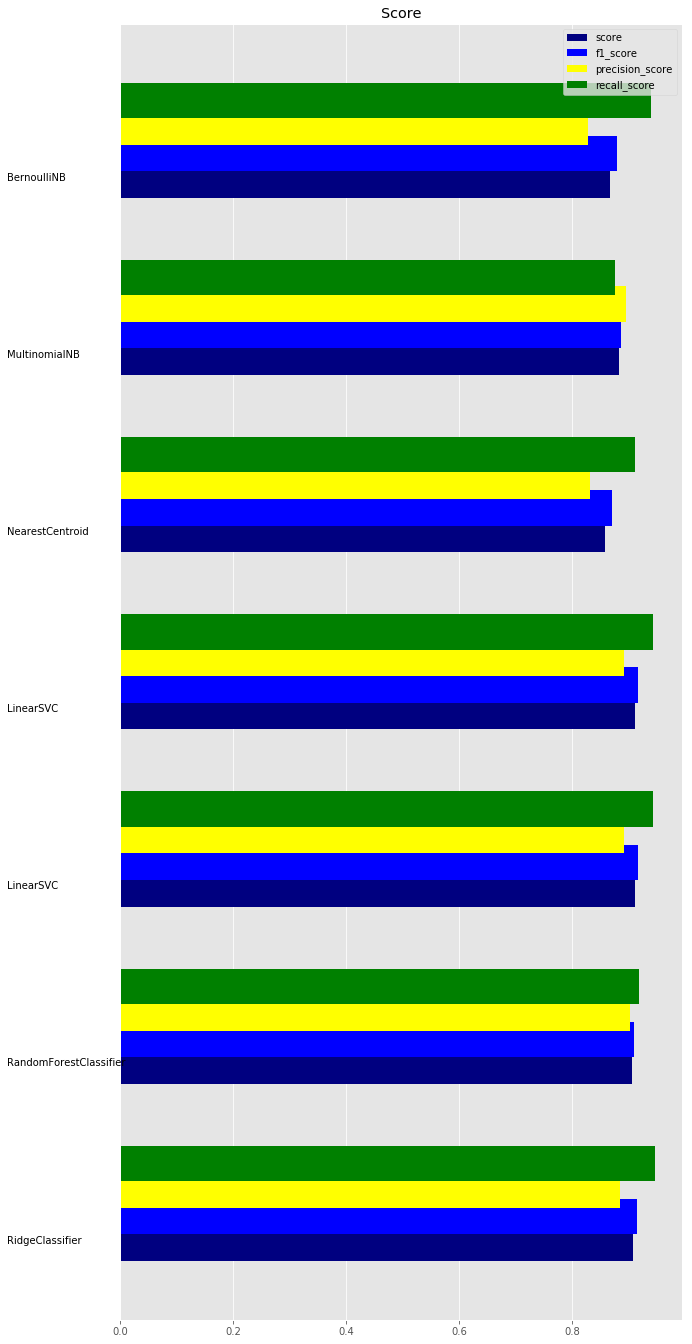

In [86]:
# make some plots
indices = np.arange(len(results))

result = [[x[i] for x in results] for i in range(8)]

clf_names, score, train_time, test_time,f1_score,precision_score,recall_score,roc_auc_score = result
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 20))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .15, f1_score, .2, label="f1_score", color='blue')
plt.barh(indices + .3, precision_score, .2, label="precision_score", color='yellow')
plt.barh(indices + .45, recall_score, .2, label="recall_score", color='green')
#plt.barh(indices + 1.2, roc_auc_score, .2, label="roc_auc_score", color='darkorange')

#plt.barh(indices + .3, training_time, .2, label="training time",
#         color='c')
#plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.2, i, c)

plt.show()

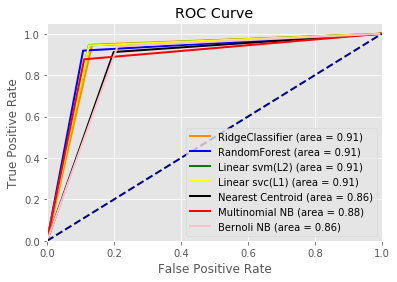

In [89]:
# make some plots
indices = np.arange(len(results))

result_roc = [[x[i] for x in results] for i in range(7,10)]
roc_auc_score,fpr,tpr = result_roc
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=2, label='RidgeClassifier (area = %0.2f)' % roc_auc_score[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=2, label='RandomForest (area = %0.2f)' % roc_auc_score[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=2, label='Linear svm(L2) (area = %0.2f)' % roc_auc_score[2])
plt.plot(fpr[3], tpr[3], color='yellow',
         lw=2, label='Linear svc(L1) (area = %0.2f)' % roc_auc_score[3])
plt.plot(fpr[4], tpr[4], color='black',
         lw=2, label='Nearest Centroid (area = %0.2f)' % roc_auc_score[4])
plt.plot(fpr[5], tpr[5], color='red',
         lw=2, label='Multinomial NB (area = %0.2f)' % roc_auc_score[5])
plt.plot(fpr[6], tpr[6], color='pink',
         lw=2, label='Bernoli NB (area = %0.2f)' % roc_auc_score[6])



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()